In [3]:
import mtcnn
from keras_vggface.vggface import VGGFace
import matplotlib.pyplot as plt
from keras_vggface import utils
from PIL import Image
from scipy.spatial.distance import cosine
import numpy as np
def extract_face(filename, size=(224,224)):
    pixels = plt.imread(filename)
    detector = mtcnn.MTCNN()
    results = detector.detect_faces(pixels)
    x1,y1,width,height = results[0]['box']
    x2,y2 = x1+width, y1+height
    face = pixels[y1:y2,x1:x2]
    image = Image.fromarray(face)
    image = image.resize(size)
    plt.imshow(image)
    return np.asarray(image)

def generate_embeddings(files):
    faces=[]
    for f in files:
        faces.append(extract_face(f))
    samples = np.asarray(faces,np.float32)
    samples = utils.preprocess_input(samples,version=2)
    model = VGGFace(include_top=False, model='senet50', input_shape=(224,224,3))
    y = model.predict(samples)
    return y

def is_match(embd_1,embd_2,theta = 0.5):
    score = cosine(embd_1,embd_2)
    print(score)
    if score<theta:
        return True
    else:
        return False

def face_identification(filename):
    pixles = extract_face(filename)
    pixles = pixles.astype('float32')
    samples = np.expand_dims(pixles,axis=0)
    samples = utils.preprocess_input(samples,version=2)

    model = VGGFace(model='resnet50')
    yhat= model.predict(samples)

    results = utils.decode_predictions(yhat)

    for r in results[0]:
        print('%s: %.3f%%' % (r[0],r[1]*100))



1/1 [==============================] - 1s 1s/step
0.33208489418029785
Same person


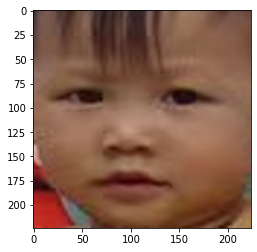

In [6]:
def face_verification(file1,file2):
    embeddings = generate_embeddings([file1,file2])
    if is_match(embd_1=embeddings[0],embd_2=embeddings[1]):
        print('Same person')
    else:
        print('Not same person')
        
face_verification('hhhdd1.jpg','hhh4.jpg')
# face_identification('hhh1.jpg')
    

In [12]:
import csv
with open('identity_meta.csv','r',encoding='utf-8') as f:
    csvFile = csv.reader(f)
    for line in csvFile:
        print(line)

['Class_ID', ' Name', ' Sample_Num', ' Flag', ' Gender']
['n000001', ' "14th_Dalai_Lama"', ' 424', ' 0', ' m']
['n000002', ' "A_Fine_Frenzy"', ' 315', ' 1', ' f']
['n000003', ' "A._A._Gill"', ' 205', ' 1', ' m']
['n000004', ' "A._J._Buckley"', ' 387', ' 1', ' m']
['n000005', ' "A._J._Pierzynski"', ' 229', ' 1', ' m']
['n000006', ' "A._R._Rahman"', ' 485', ' 1', ' m']
['n000007', ' "A._Raja"', ' 259', ' 1', ' m']
['n000008', ' "AB_de_Villiers"', ' 273', ' 1', ' m']
['n000009', ' "AYAMI"', ' 136', ' 0', ' f']
['n000010', ' "Aamani"', ' 156', ' 1', ' f']
['n000011', ' "Aamna_Sharif"', ' 380', ' 1', ' f']
['n000012', ' "Aaron_Ashmore"', ' 382', ' 1', ' m']
['n000013', ' "Aaron_Hernandez"', ' 314', ' 1', ' m']
['n000014', ' "Aaron_Lennon"', ' 288', ' 1', ' m']
['n000015', ' "Aaron_Motsoaledi"', ' 248', ' 1', ' m']
['n000016', ' "Aaron_Ramsey"', ' 449', ' 1', ' m']
['n000017', ' "Aaron_Rodgers"', ' 319', ' 1', ' m']
['n000018', ' "Aaron_Schock"', ' 283', ' 1', ' m']
['n000019', ' "Aaron_Stan

In [4]:
import os
cls =[]
for root,dirs,files in os.walk('./test'):
    for d in dirs:
        cls.append(d)

In [11]:
import os
from glob import glob
from random import shuffle
train_image_paths = []
test_image_paths  = []
train_labels = []
test_labels = []

for c in cls:
    pth = os.path.join('test',c,'*.{:s}'.format('jpg'))
    pth = glob(pth)
            # train
    shuffle(pth)
    test_pth = pth[:50]
    train_pth = pth[50:]
    train_image_paths.extend(train_pth)
    train_labels.extend([c]*len(train_pth))
    test_image_paths.extend(test_pth)
    test_labels.extend([c]*len(test_pth))


'n000001'